---
title: "Lab 1"
author: "Tyler Allen"
date: "2024-10-02"
format:
  html:
    theme: lux
---

**Task 1**



1: Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

The aesthetics being used are income, life expectancy, population, year, and world regions. Income is on the x-axis, life expectancy is on the y-axis, population is the size of the bubbles, the year 2010 is in the background, and the world regions are the color of the bubbles.

2: Import the q1data.csv dataset.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving q1data.csv to q1data.csv


In [4]:
import pandas as pd
#| echo:false
#| eval: false

df1 = pd.read_csv('q1data.csv')
df1.head()

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


3: Recreate the plot as best you can using plotnine.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 11 rows containing missing values.


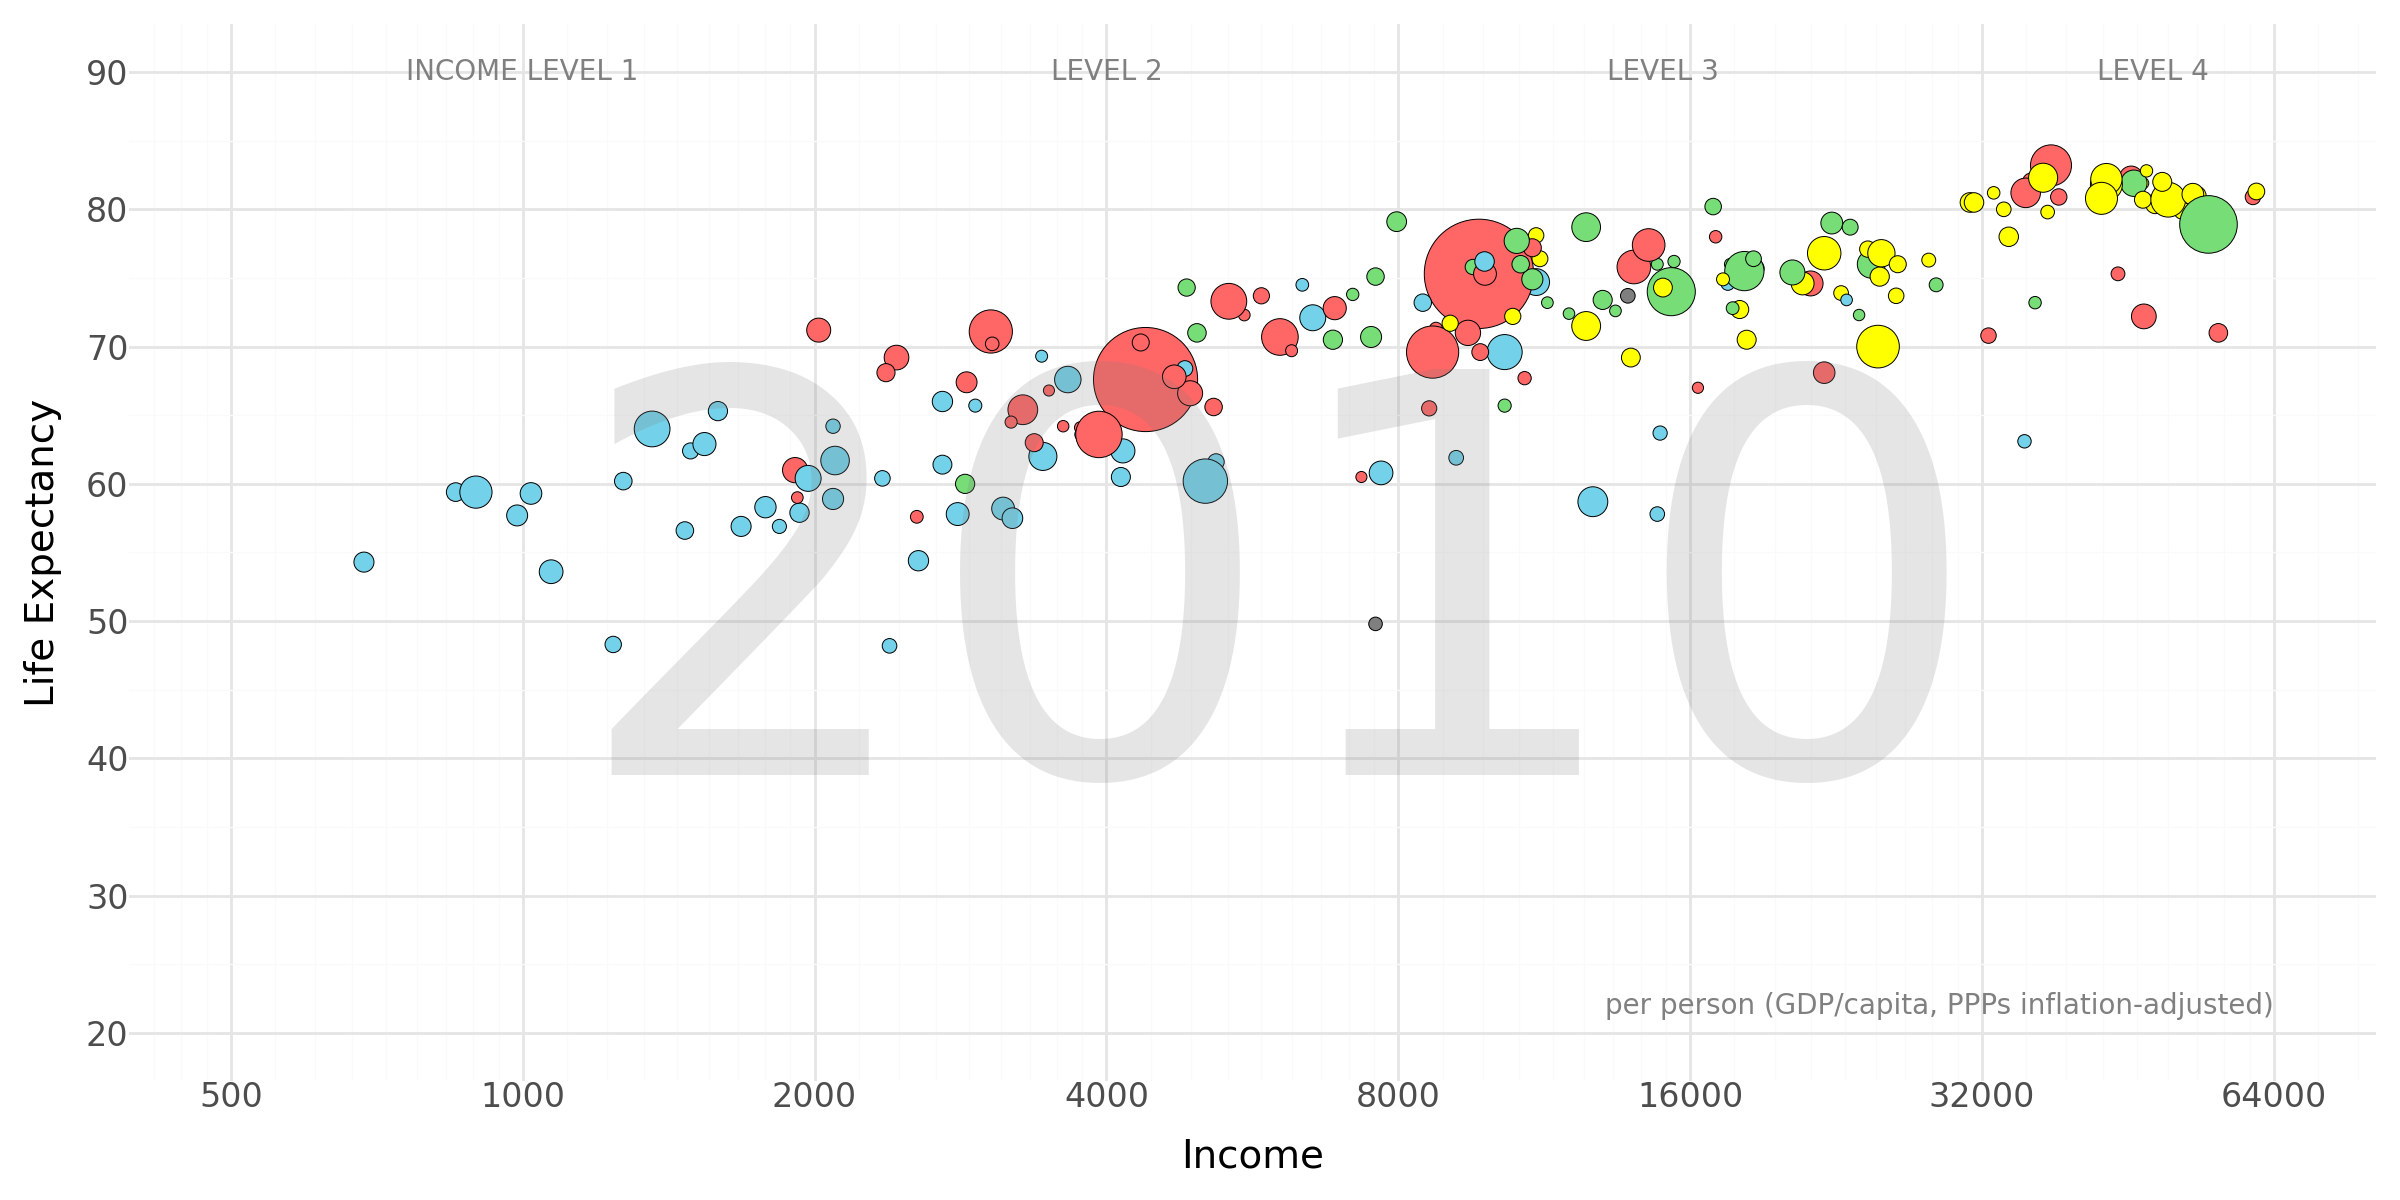

In [54]:
from plotnine import ggplot, aes, geom_point, scale_x_log10, labs, scale_size, theme_minimal, annotate, theme, scale_y_continuous, element_text, scale_fill_manual, element_rect
import matplotlib.pyplot as plt

df1['four_regions'] = df1['four_regions'].str.strip().str.title()


bubble_plot = (
    ggplot(df1, aes(x='income', y='life_exp', size='population', fill='four_regions')) +
    geom_point(alpha=1, stroke=0.2, color='black') +  # Set stroke to add black border
    scale_x_log10(breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000], limits=[500,64000]) +
    scale_y_continuous(breaks=[20, 30, 40, 50, 60, 70, 80, 90], limits=[20, 90]) +
    scale_size(range=[2, 22], breaks=[500000000, 1000000000]) +  # Set bubble sizes based on population
    scale_fill_manual(values={
        'Africa': '#74D1EA',     # found on icolorpalette.com
        'Americas': '#77DD77',   # found on icolorpalette.com
        'Asia': '#FF6666',      # found on icolorpalette.com
        'Europe': '#FFFF00'      # found on icolorpalette.com
    }) +
    labs(
        x='Income',
        y='Life Expectancy',
        size='Population',
        fill='Region'
    ) +
    theme_minimal() +
    # Add a large text annotation for "2010" in the background
    annotate('text', x=6000, y=50, label='2010', size=200, alpha=0.2, color='gray') +
    # Add the additional text annotation in the bottom-right corner
    annotate('text', x=64000, y=22, label='per person (GDP/capita, PPPs inflation-adjusted)', size=10, ha='right', color='gray') +
    # Add income levels at the top of the plot
    annotate('text', x=1000, y=90, label='INCOME LEVEL 1', size=10, ha='center', color='gray') +
    annotate('text', x=4000, y=90, label='LEVEL 2', size=10, ha='center', color='gray') +
    annotate('text', x=15000, y=90, label='LEVEL 3', size=10, ha='center', color='gray') +
    annotate('text', x=48000, y=90, label='LEVEL 4', size=10, ha='center', color='gray') +
    theme(
        legend_position='none',  #was told ny classmates that we don't need a legend
        figure_size=(12, 6),  # adjust the width and height of the plot
        axis_text_x=element_text(size=12),
        axis_text_y=element_text(size=12),
        axis_title_x=element_text(size=14),
        axis_title_y=element_text(size=14),
        panel_background=element_rect(fill='white')  # Ensure the background is white
    )
)

# Display the plot
bubble_plot


4: What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it's good or bad for visualizing these data.

<ipython-input-60-0c14bda3a8dc>:33: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 7 rows containing non-finite values.


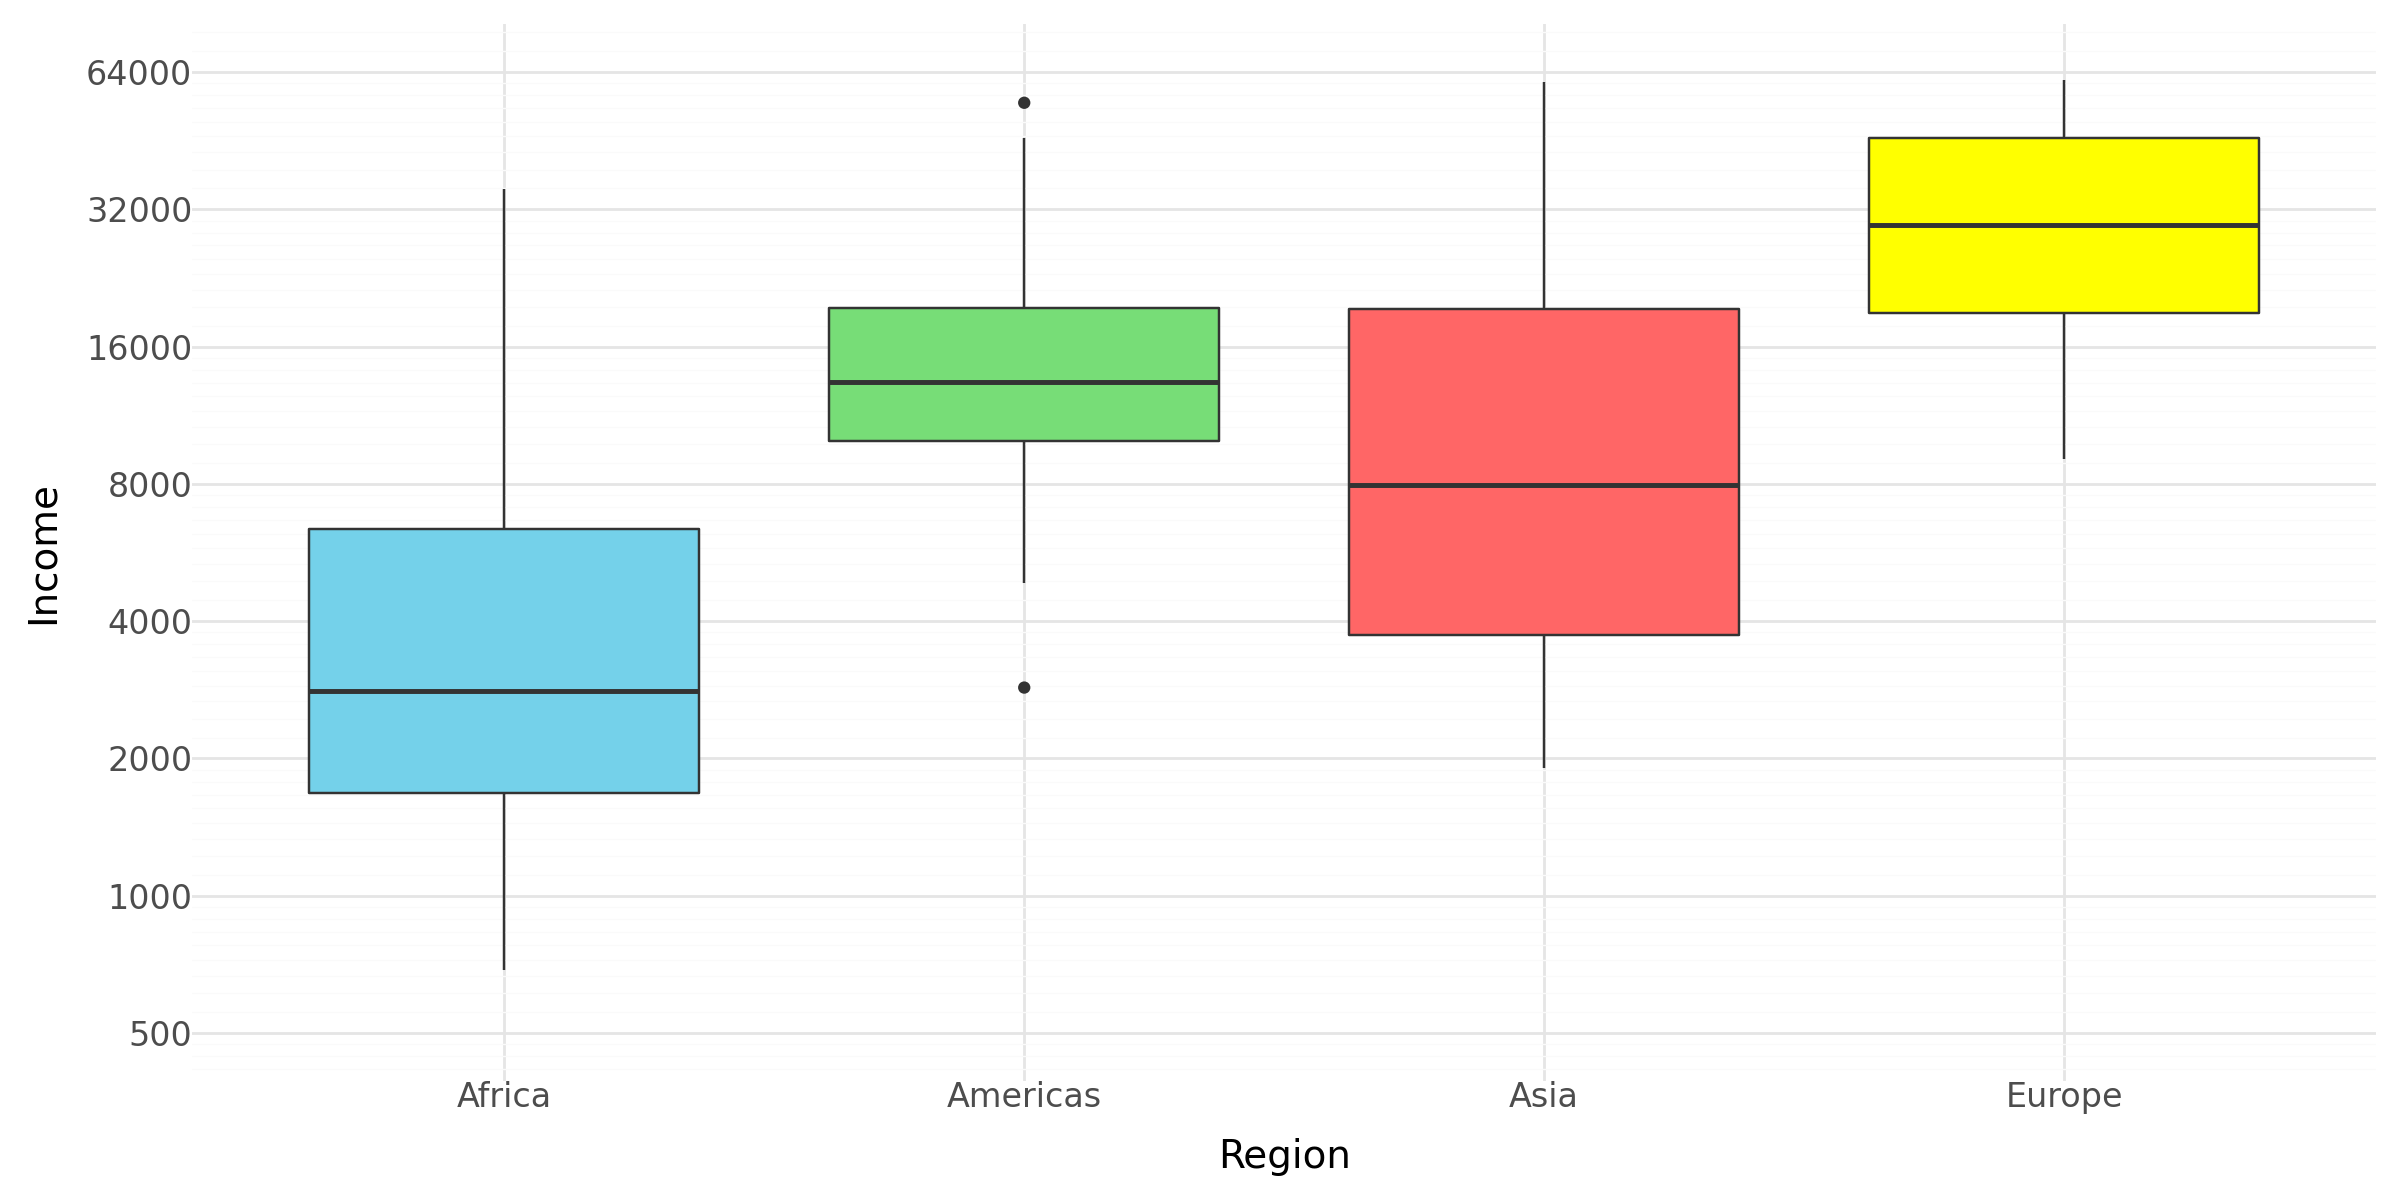

In [60]:
from plotnine import geom_boxplot

df1_cleaned = df1.dropna(subset=['income', 'four_regions'])
# Boxplot of income (log-scaled) across regions
boxplot = (
    ggplot(df1_cleaned, aes(x='four_regions', y='income', fill='four_regions')) +  # Box plot to compare income across regions
    geom_boxplot() +
    scale_y_log10(breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000], limits=[500, 64000]) +
    scale_fill_manual(values={
        'Africa': '#74D1EA',
        'Americas': '#77DD77',
        'Asia': '#FF6666',
        'Europe': '#FFFF00'
    }) +
    labs(
        x='Region',
        y='Income',
        fill='Region'
    ) +
    theme_minimal() +
    theme(
        legend_position='none',
        figure_size=(12, 6),
        axis_text_x=element_text(size=12),
        axis_text_y=element_text(size=12),
        axis_title_x=element_text(size=14),
        axis_title_y=element_text(size=14),
        panel_background=element_rect(fill='white')
    )
)

# Display the plot
print(boxplot)


Some other geometries I could use are geom_col, geom_violin, and geom_boxplot. The plot above is an example of geom_boxplot being applied to the same dataset as before. I think that the geom_boxplot is better in some ways and worse in other ways. It allows us to better visualize the distribution of income across the different regions, and it even gives us the ranges, quantiles, medians, and outliers for each one. Geom_point is better for visualizing the relationships between multiple variables, such as income, life expectancy, population, and region. In this case, geom_point is better since we are visualizing multiple variables and displaying individual data points.


**Task 2**

1: Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

The aesthetics being used are exports (\% of GDP), imports (\% of GDP), world regions, year, and energy use. Exports (\% of GDP) is on the x-axis, imports (\% of GDP) is on the y-axis, energy use is the size of the bubbles, the year 1997 is in the background, and the world regions are the color of the bubbles.

2: Import the q2data.csv dataset.

In [13]:
from google.colab import files
uploaded = files.upload()

Saving q2data.csv to q2data.csv


In [14]:
import pandas as pd
#| echo: false
#| eval: false

df2 = pd.read_csv('q2data.csv')
df2.head()

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


3: Recreate the plot as best you can using plotnine.

<ipython-input-57-6ddfb0fc7b80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-57-6ddfb0fc7b80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-57-6ddfb0fc7b80>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-57-6ddfb0fc7b80>

['Europe' 'Africa' 'Americas' 'Asia' nan]


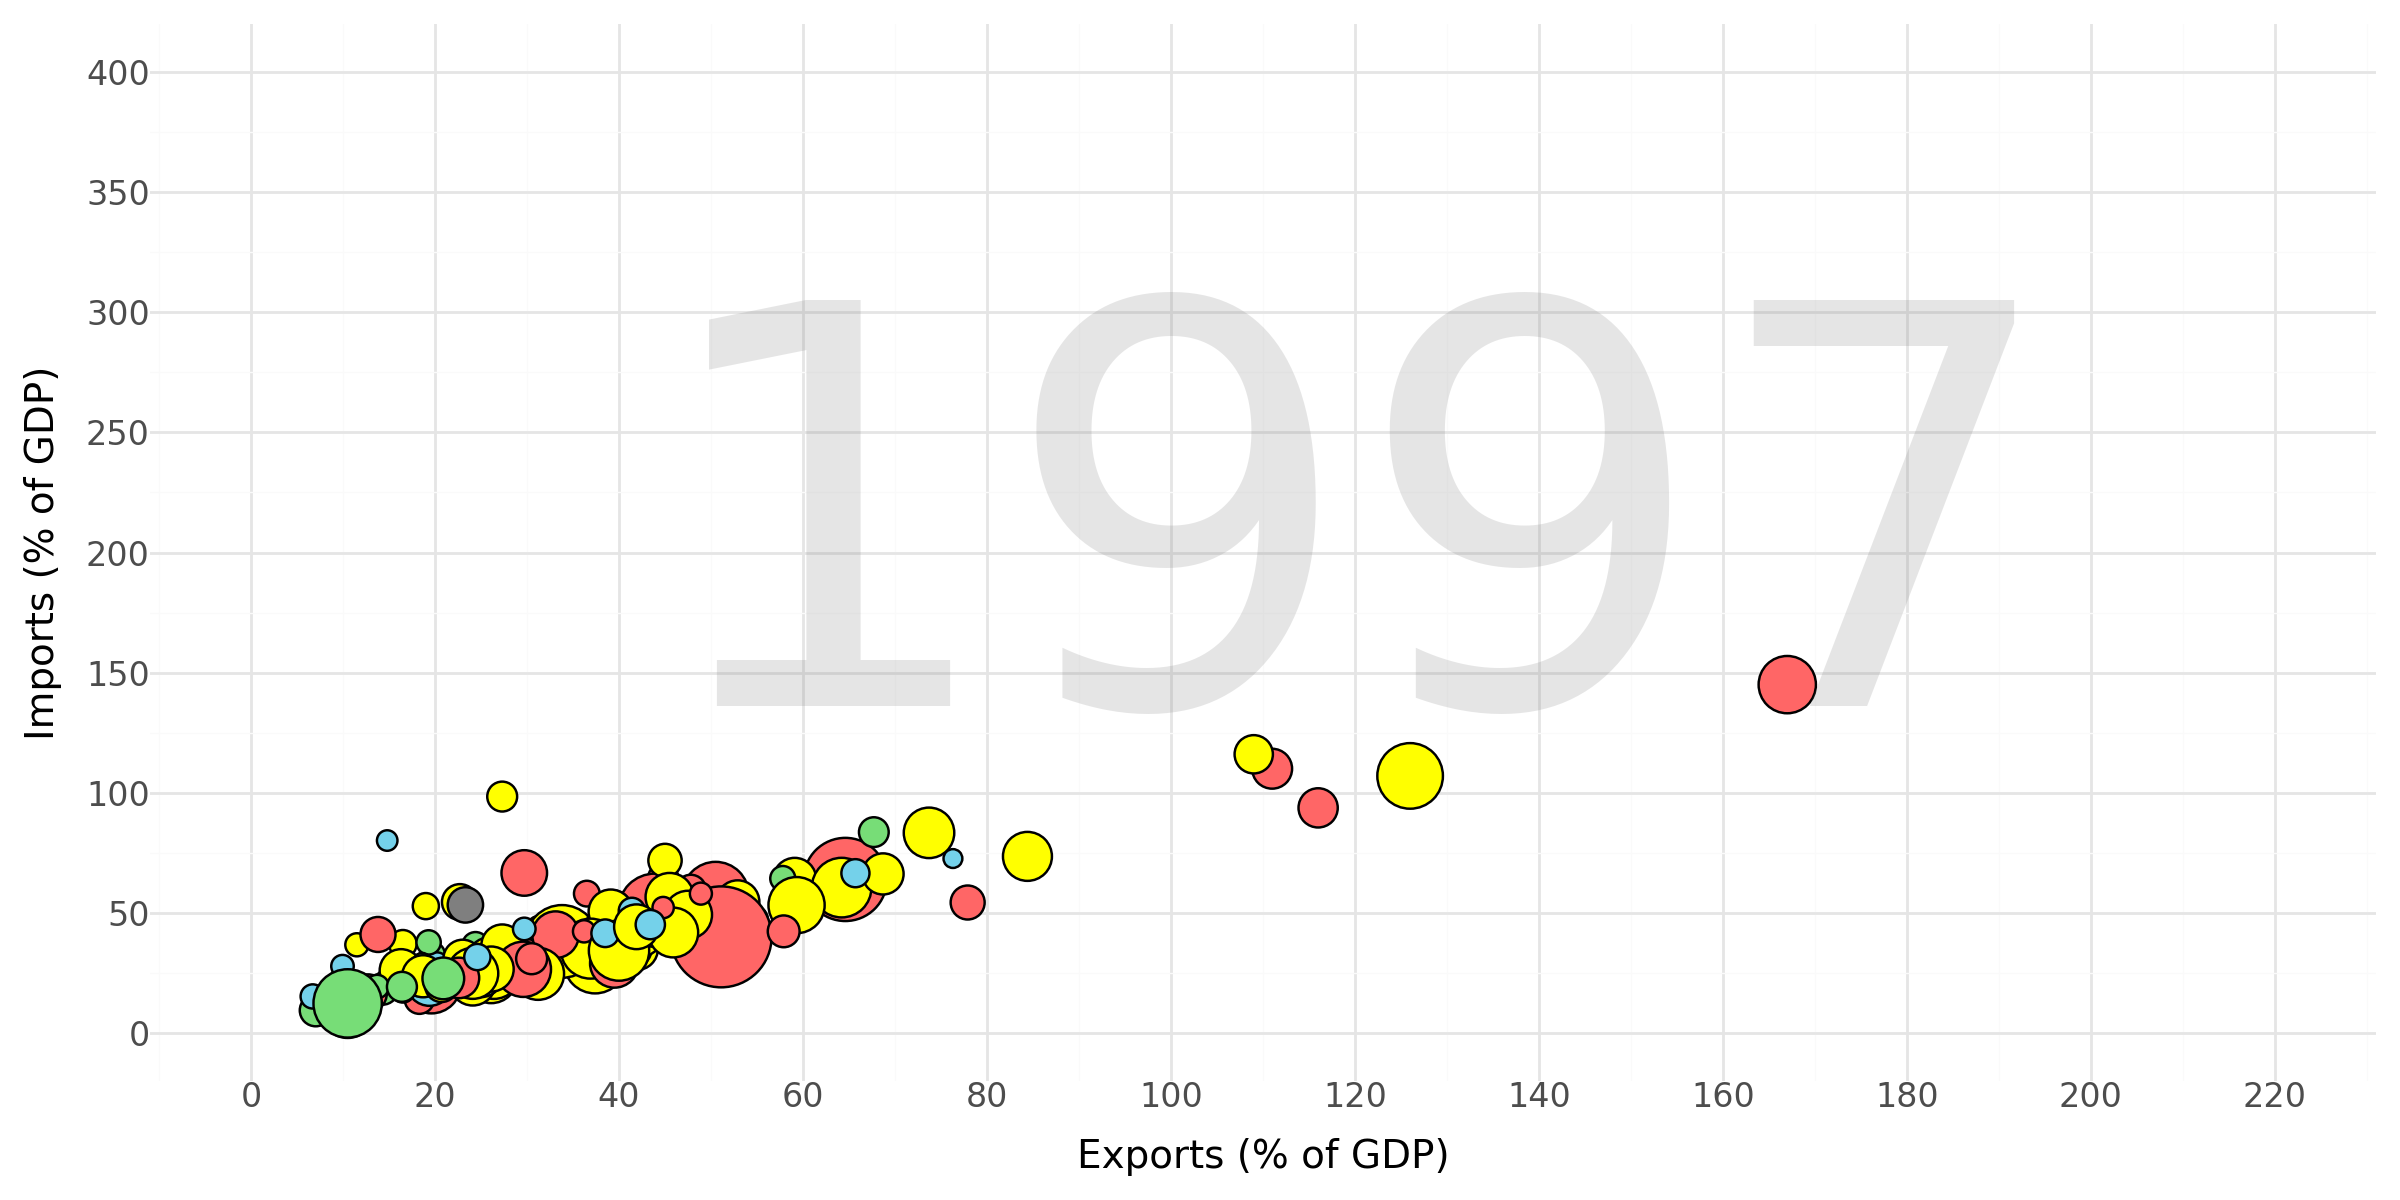

In [57]:

# Ensure that all columns are properly numeric
df2['exports'] = pd.to_numeric(df2['exports'], errors='coerce')  # Force non-numeric values to NaN
df2['imports'] = pd.to_numeric(df2['imports'], errors='coerce')  # Force non-numeric values to NaN
df2['energy'] = pd.to_numeric(df2['energy'], errors='coerce')    # Force non-numeric values to NaN

# Check for inconsistencies or missing values in 'four_regions'
df2['four_regions'] = df2['four_regions'].str.strip().str.title()  # Clean spaces and standardize case
print(df2['four_regions'].unique())  # Print unique values to verify consistency

# Drop rows with missing values in critical columns
df2_cleaned = df2.dropna(subset=['exports', 'imports', 'energy'])

bubble_plot = (
    ggplot(df2_cleaned, aes(x='exports', y='imports', size='energy', fill='four_regions')) +
    geom_point(alpha=1, stroke=0.5, color='black') +
    scale_x_continuous(breaks=[0,20,40,60,80,100,120,140,160,180,200,220], limits=[0,220]) +
    scale_y_continuous(breaks=[0,50,100,150,200,250,300,350,400], limits=[0, 400]) +
    scale_size(range=[2, 20]) +
    scale_fill_manual(values={
        'Africa': '#74D1EA',
        'Americas': '#77DD77',
        'Asia': '#FF6666',
        'Europe': '#FFFF00',
        'Unknown': '#CCCCCC'     # Gray for unknown regions
    }) +
    labs(
        x='Exports (% of GDP)',
        y='Imports (% of GDP)',
        size='Energy use',
        fill='Region'
    ) +
    theme_minimal() +
    annotate('text', x=120, y=200, label='1997', size=200, alpha=0.2, color='gray') +
    theme(
        legend_position='none',  #was told by classmates that we don't need a legend
        figure_size=(12, 6),
        axis_text_x=element_text(size=12),
        axis_text_y=element_text(size=12),
        axis_title_x=element_text(size=14),
        axis_title_y=element_text(size=14),
        panel_background=element_rect(fill='white')
    )
)

# Display the plot
bubble_plot


4: What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it's good or bad for visualizing these data.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_tile : Removed 33 rows containing missing values.


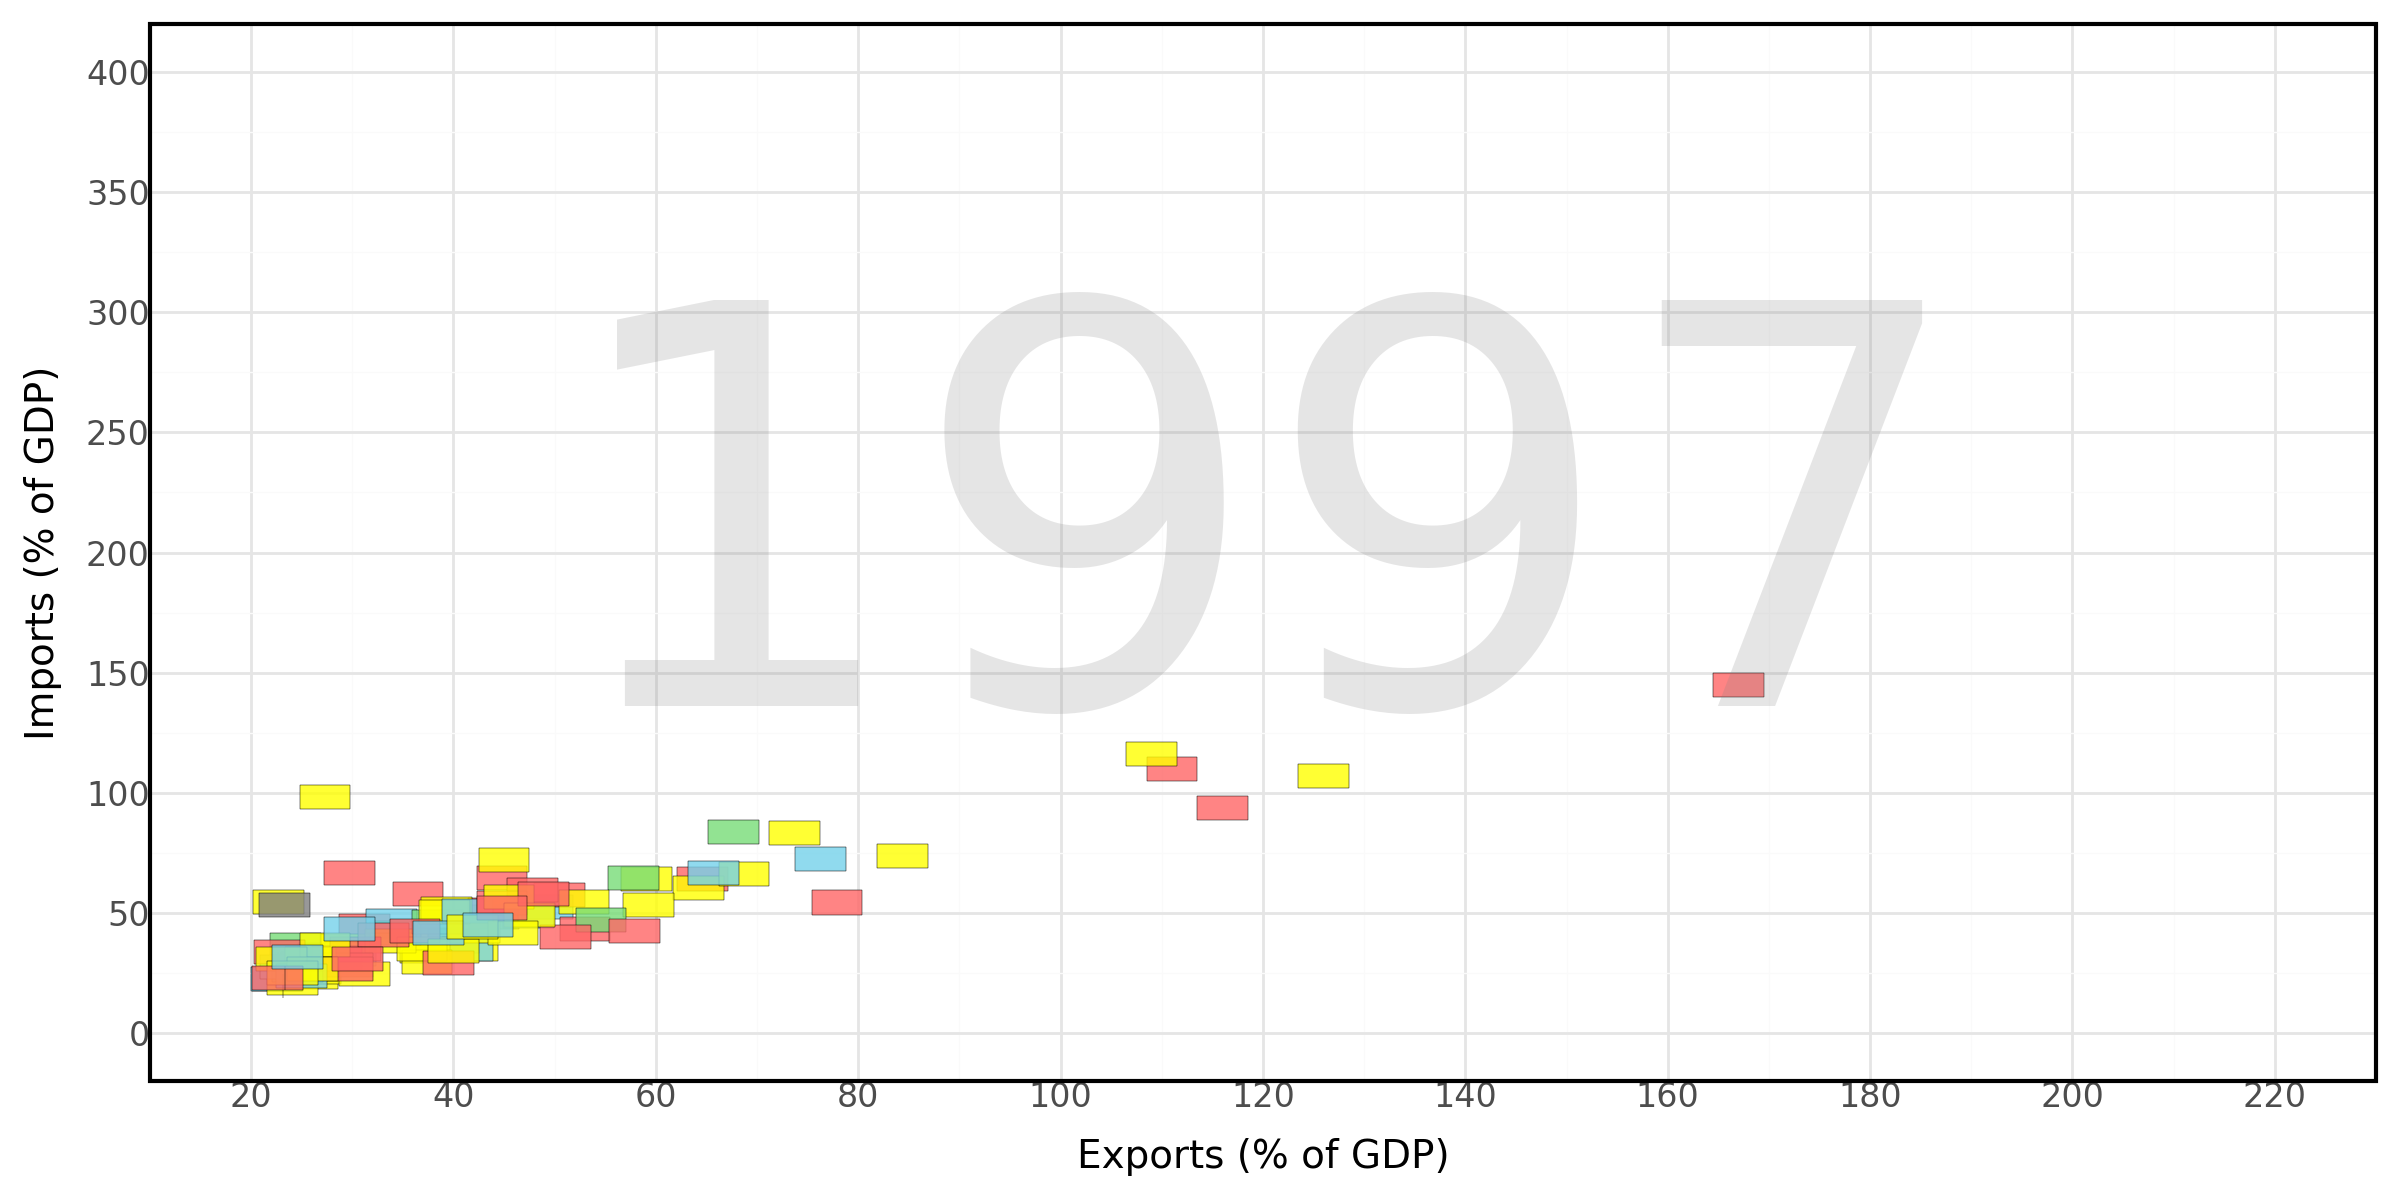

In [46]:
from plotnine import geom_tile

# Create the plot using geom_tile to explore a different geometry
tile_plot = (
    ggplot(df2, aes(x='exports', y='imports', fill='four_regions')) +
    geom_tile(aes(width=5, height=10), color='black', alpha=0.8) +  # Use geom_tile with fixed width and height
    scale_x_continuous(breaks=[20,40,60,80,100,120,140,160,180,200,220], limits=[20,220]) +
    scale_y_continuous(breaks=[0,50,100,150,200,250,300,350,400], limits=[0, 400]) +
    scale_fill_manual(values={
        'Africa': '#74D1EA',
        'Americas': '#77DD77',
        'Asia': '#FF6666',
        'Europe': '#FFFF00',
        'Unknown': '#CCCCCC'
    }) +
    labs(
        x='Exports (% of GDP)',
        y='Imports (% of GDP)',
        fill='Region'
    ) +
    theme_minimal() +

    annotate('text', x=120, y=200, label='1997', size=200, alpha=0.2, color='gray') +
    theme(
        legend_position='none',
        figure_size=(12, 6),
        axis_text_x=element_text(size=12),
        axis_text_y=element_text(size=12),
        axis_title_x=element_text(size=14),
        axis_title_y=element_text(size=14),
        panel_border=element_rect(color='black', size=1.5),
        panel_background=element_rect(fill='white')
    )
)

tile_plot


Some other geometries that I explored are geom_tile, geom_bar, and geom_line. The above plot is an example of geom_tile which represents each data point as a rectangular tile with equal size. Geom_tile is not good for these data because it doesn't allow for continuous scaling, such as bubble size in the bubble plot. This makes it worse for showing variations in extra variables such as energy use.

**Task 3**

1: Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

The aesthetics being used are individuals using the internet, GDP/capita, world regions, year, and income. Individuals using the internet is on the x-axis, GDP/capita is on the y-axis, income is the size of the bubbles, the year 2001 is in the background, and the world regions are the color of the bubbles.

2: Import the q3data.csv dataset.

In [63]:
from google.colab import files
uploaded = files.upload()

Saving q3data.csv to q3data (1).csv


In [64]:
#| echo: false
#| eval: false

df3 = pd.read_csv('q3data.csv')
df3.head()

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia


3: Recreate the plot as best you can using plotnine.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 33 rows containing missing values.


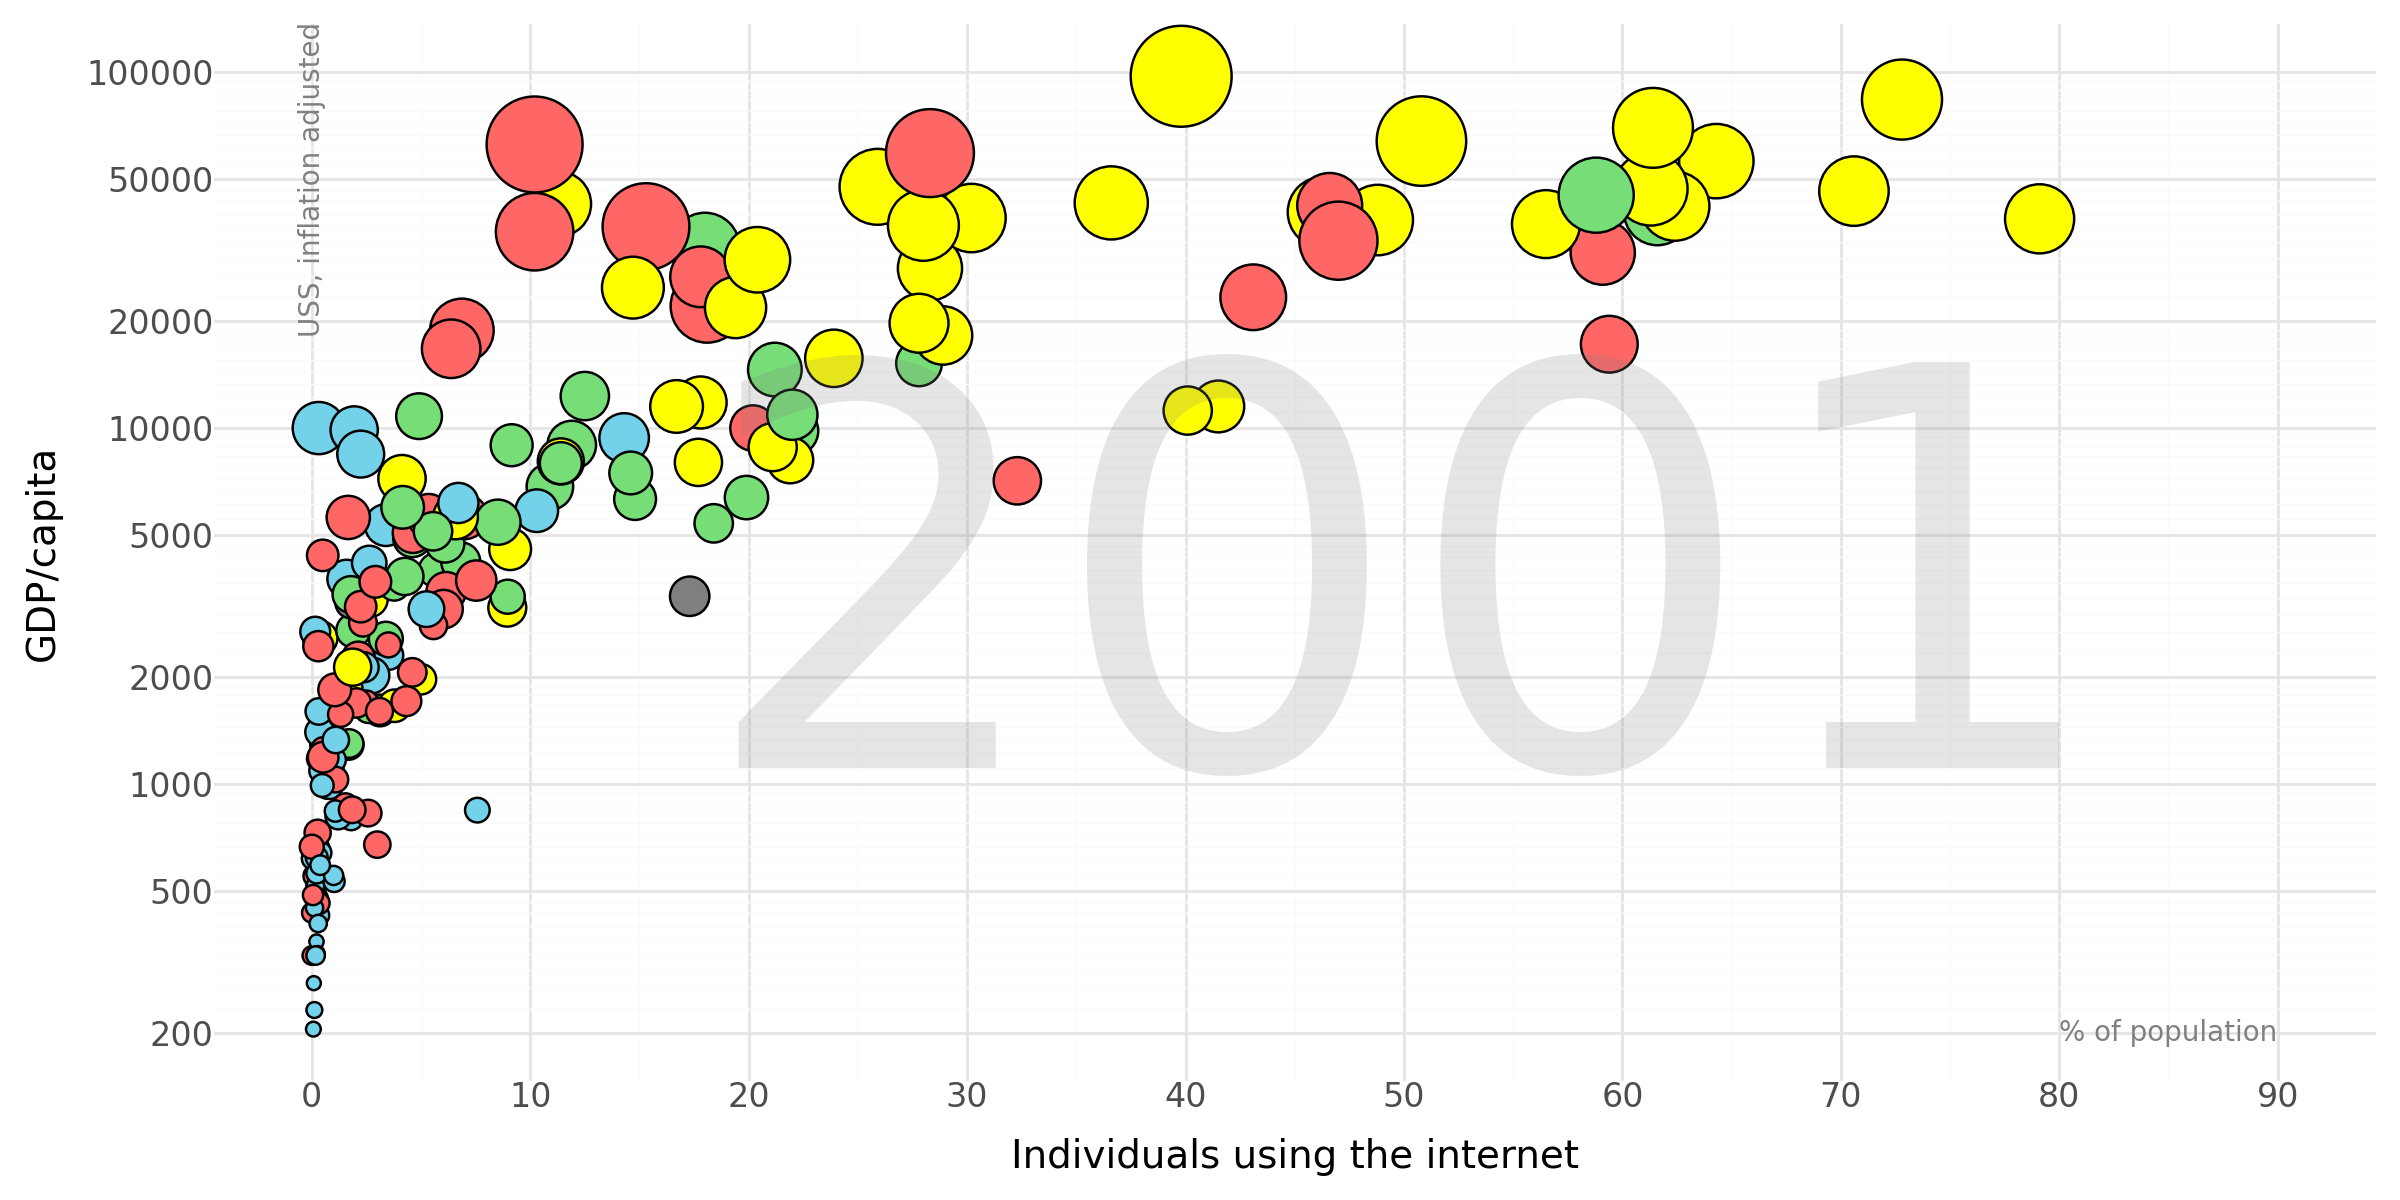

In [65]:
# Create the bubble plot
bubble_plot = (
    ggplot(df3, aes(x='internet_users', y='gdp', size='income', fill='four_regions')) +
    geom_point(alpha=1, stroke=0.5, color='black') +  # Set stroke to add black border
    scale_x_continuous(breaks=[0,10, 20, 30, 40, 50, 60, 70, 80, 90], limits=[0, 90]) +  # Linear scale for x-axis
    scale_y_log10(breaks=[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000], limits=[200, 100000]) +  # Log scale for y-axis
    scale_size(range=[2, 20]) +  # Bubble sizes based on income
    scale_fill_manual(values={
        'asia': '#FF6666',
        'europe': '#FFFF00',
        'africa': '#74D1EA',
        'americas': '#77DD77'
    }) +
    labs(
        x='Individuals using the internet',
        y='GDP/capita',
        size='Income',
        fill='Region'
    ) +
    theme_minimal() +
    annotate('text', x=50, y=3000, label='2001', size=200, alpha=0.2, color='gray') +
    annotate('text', x=90, y=200, label='% of population', size=10, ha='right', color='gray') +
    annotate('text', x=0, y=50000, label='USS, inflation adjusted', size=10, angle=90, color='gray', ha='center') +
    theme(
        legend_position='none',  #was told by classmates that we don't need a legend
        figure_size=(12, 6),
        axis_text_x=element_text(size=12),
        axis_text_y=element_text(size=12),
        axis_title_x=element_text(size=14),
        axis_title_y=element_text(size=14),
        panel_background=element_rect(fill='white')
    )
)

# Display the plot
bubble_plot


4: What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it's good or bad for visualizing these data.

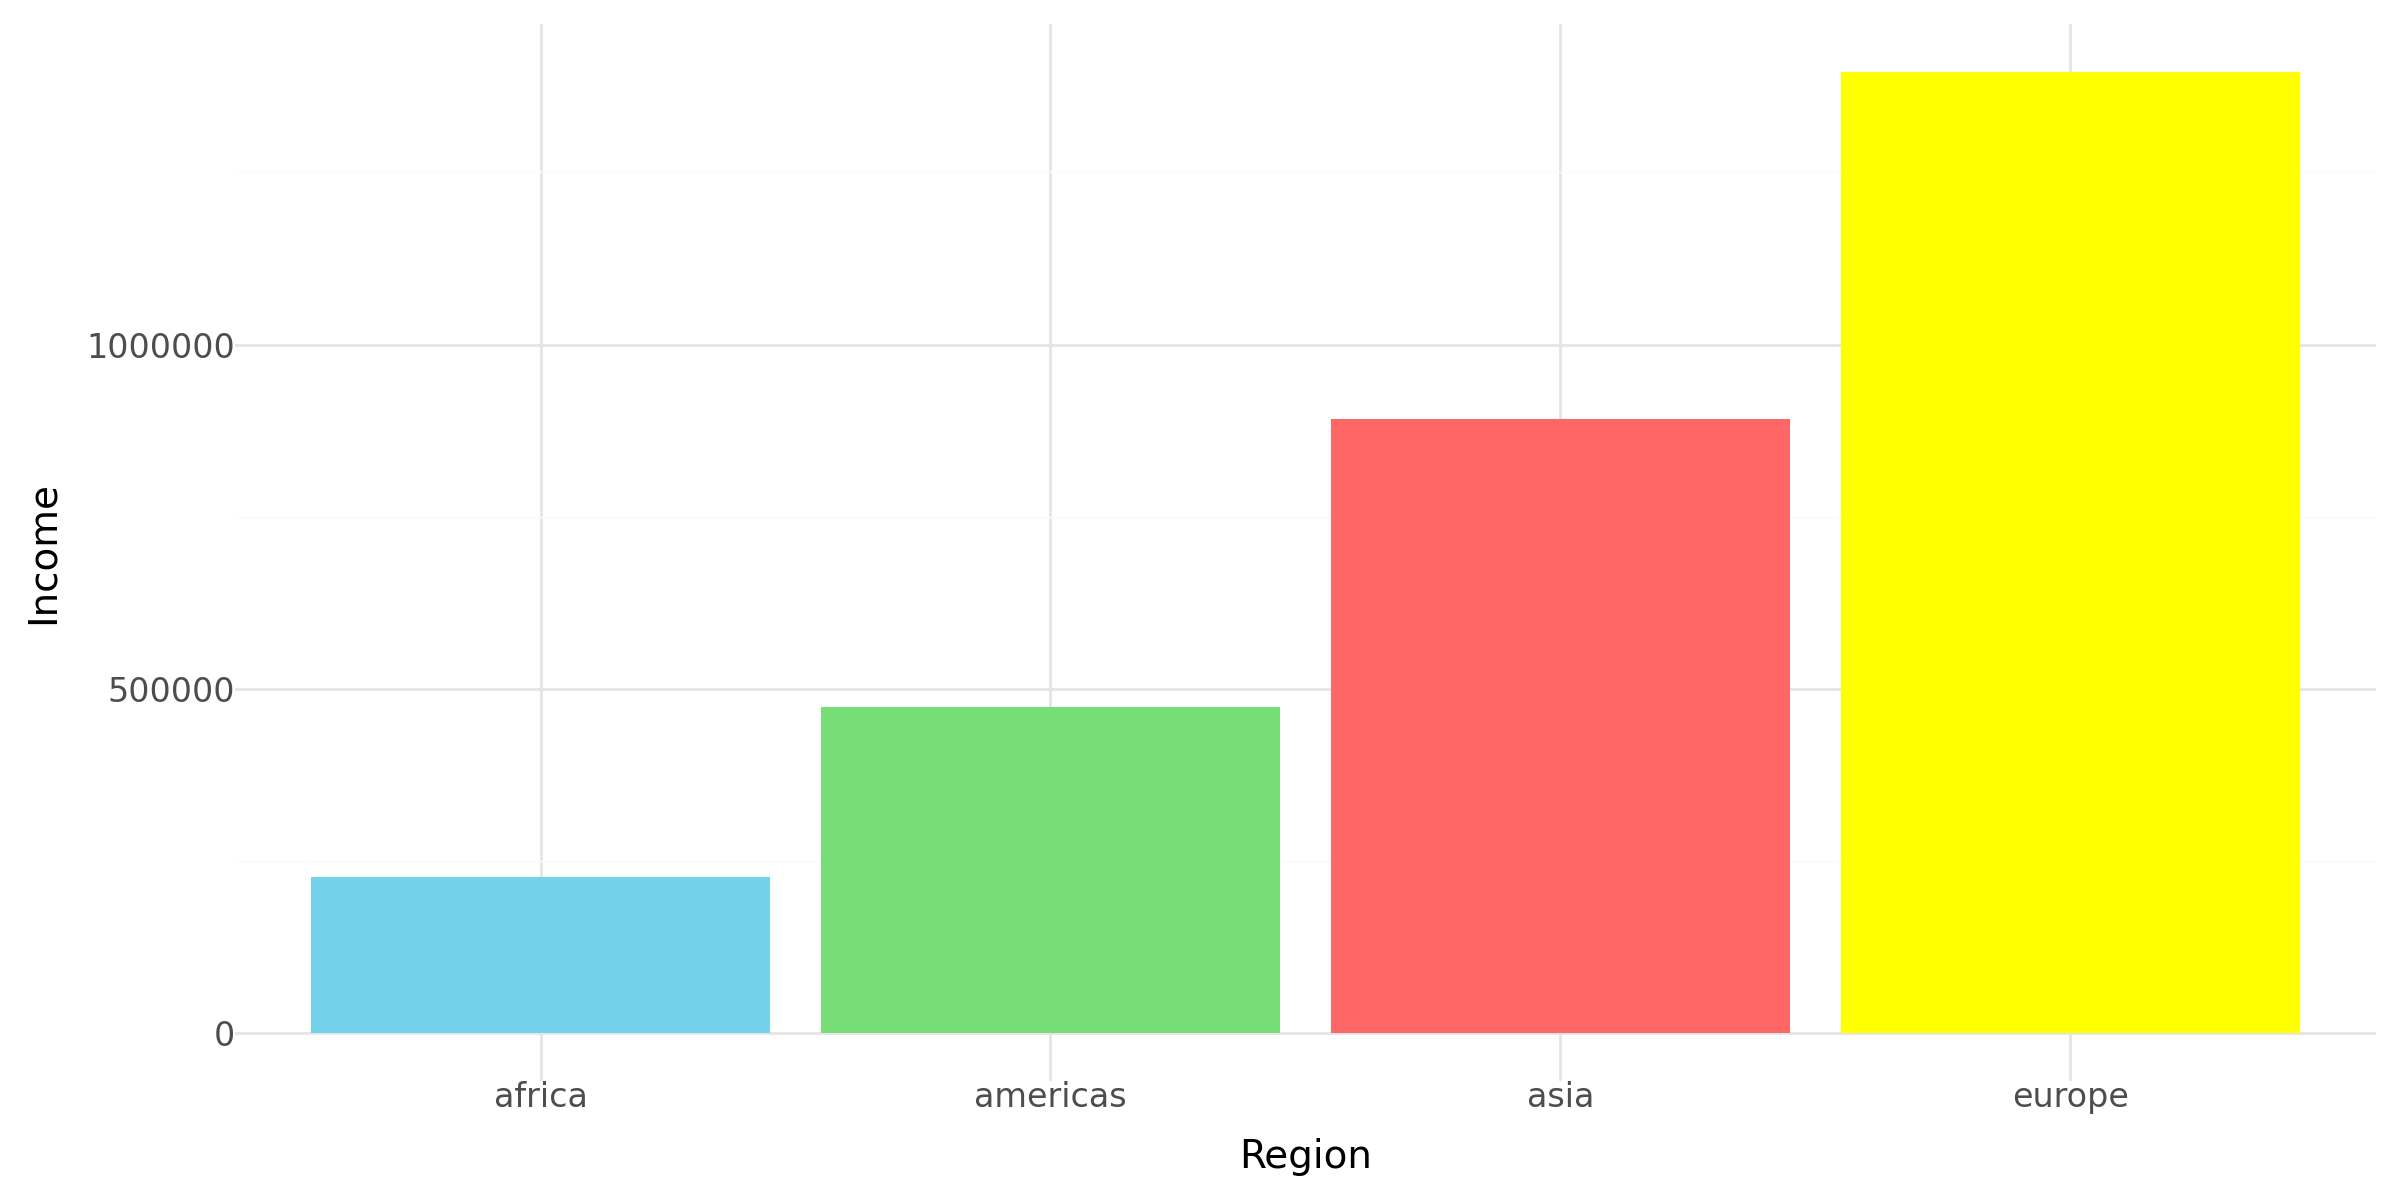

In [68]:
from plotnine import geom_col

df3_cleaned = df3.dropna(subset=['income', 'four_regions'])

# Create a bar plot to show total income by region
bar_plot = (
    ggplot(df3_cleaned, aes(x='four_regions', y='income', fill='four_regions')) +
    geom_col() +  # Use geom_col to represent the total income for each region
    scale_fill_manual(values={
        'asia': '#FF6666',
        'europe': '#FFFF00',
        'africa': '#74D1EA',
        'americas': '#77DD77'
    }) +
    labs(
        x='Region',
        y='Income',
        fill='Region'
    ) +
    theme_minimal() +
    theme(
        legend_position='none',  # No need for legend
        figure_size=(12, 6),
        axis_text_x=element_text(size=12),
        axis_text_y=element_text(size=12),
        axis_title_x=element_text(size=14),
        axis_title_y=element_text(size=14),
        panel_background=element_rect(fill='white')
    )
)

# Display the plot
bar_plot


Above is a bar plot showing each region's income. This is not good for visualizing these data because this only shows each region and the amount of total income they have. It doesn't help visualize any other variables such as GDP/capita or the amount of individuals using the internet.